# Lab 05. 데이터 예시를 통한 공분산과 상관 행렬 계산 및 해석 실습
---

In [1]:
import numpy as np

- 예시 데이터를 생성한다.

In [2]:
# 예시 데이터 생성
x = np.array([1, 2, 3, 4, 5])     # 변수 x의 값
y = np.array([2, 4, 6, 8, 10])    # 변수 y의 값
z = np.array([3, 6, 9, 12, 15])   # 변수 z의 값

- 공분산을 계산해본다.

In [3]:
# 공분산 계산
cov_matrix = np.cov([x, y, z])

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]


- 상관 행렬을 계산해본다.

In [4]:
# 상관 행렬 계산
cor_matrix = np.corrcoef([x, y, z])

print("Correlation Matrix:")
print(cor_matrix)

Correlation Matrix:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


- 다중 공선성을 판단해본다.

In [5]:
# 다중 공선성 판단
threshold = 0.7    # 상관 계수의 임계값 설정

print("Variables with high multicollinearity:")
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            print(f"Variable {i + 1} and Variable {j + 1}")

Variables with high multicollinearity:
Variable 1 and Variable 2
Variable 1 and Variable 3
Variable 2 and Variable 3


- 예시 데이터와 데이터 행렬을 생성한다.

In [6]:
# 예시 데이터 생성
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x3 = np.random.normal(0, 1, 100)

# 데이터 행렬 생성
data = np.vstack([x1, x2, x3]).T

- 상관 행렬을 계산해본다.

In [7]:
# 상관 행렬 계산
cor_matrix = np.corrcoef(data, rowvar=False)

- 히트맵으로 상관 행렬을 시각화 해본다.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

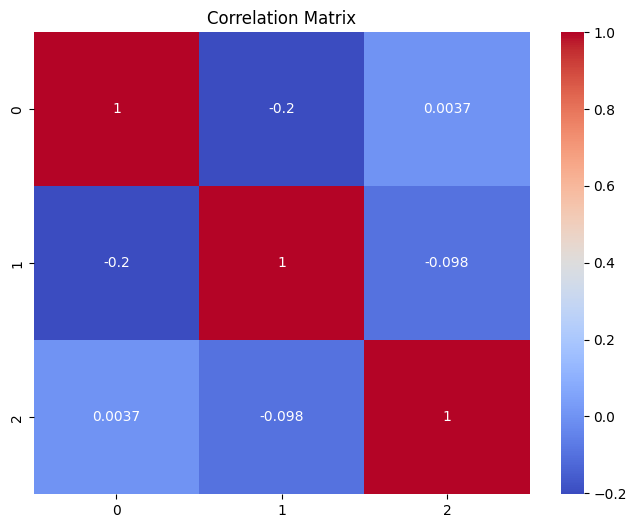

In [9]:
# 히트맵으로 상관 행렬 시각화
plt.figure(figsize = (8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

- 상관 계수의 절대값이 일정 임계값 이상인 변수를 선택한다.

In [10]:
# 상관 계수의 절대값이 일정 임계값 이상인 변수 선택
threshold = 0.1

selected_vars = []
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            selected_vars.extend([i, j])
            
print(selected_vars)

[0, 1]


- 선택된 변수들로 차원 축소된 데이터를 생성한다.

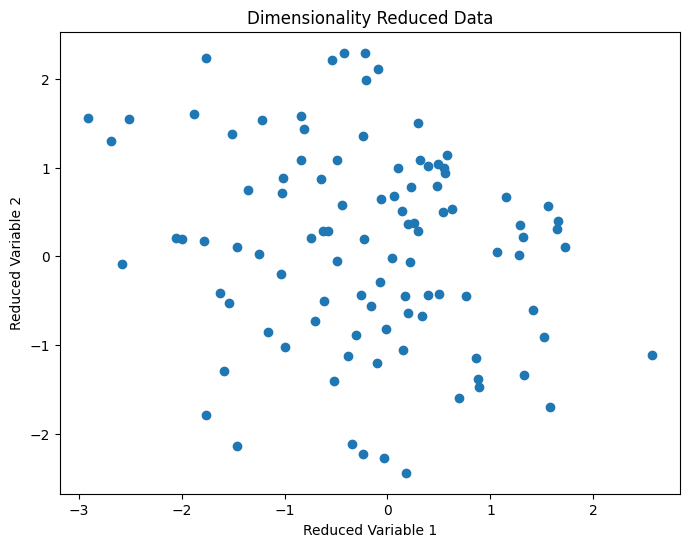

In [11]:
# 선택된 변수들로 차원 축소된 데이터 생성
if selected_vars:
    reduced_data = data[:, list(set(selected_vars))]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
    plt.xlabel('Reduced Variable 1')
    plt.ylabel('Reduced Variable 2')
    plt.title('Dimensionality Reduced Data')
    
    plt.show()
else:
    print('데이터셋에서 선택된 변수가 없어 차원 축소가 이루어지지 않았음.')